In [1]:
!pip install --upgrade diffusers transformers -q

In [2]:
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2

In [ ]:
class Config:
    device_type = "cuda"
    random_seed = 42
    torch_generator = torch.Generator(device_type).manual_seed(random_seed)
    inference_steps = 35
    diffusion_model_id = "stabilityai/stable-diffusion-2"
    output_dimensions = (400, 400)
    guidance_strength = 9
    text_model_id = "gpt2"
    dataset_size = 6
    max_text_length = 12

In [ ]:
from diffusers import StableDiffusionPipeline
from google.colab import userdata
import torch

token = userdata.get('HGF_auth_token')

diffusion_model = StableDiffusionPipeline.from_pretrained(
    Config.diffusion_model_id,
    torch_dtype=torch.float16,
    revision="fp16",
    use_auth_token=token,
    guidance_scale=Config.guidance_strength
)
diffusion_model = diffusion_model.to(Config.device_type)

In [7]:
def create_image(prompt_text, model):
    """Generate an image using the given prompt and diffusion model."""
    generated_image = model(
        prompt_text,
        num_inference_steps=Config.inference_steps,
        generator=Config.torch_generator,
        guidance_scale=Config.guidance_strength
    ).images[0]

    resized_image = generated_image.resize(Config.output_dimensions)
    return resized_image

  0%|          | 0/35 [00:00<?, ?it/s]

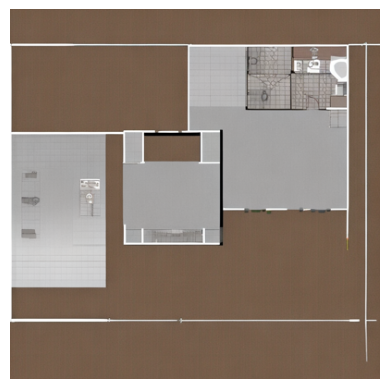

In [8]:
generated_image = create_image("Generate an image of a floor plan of a house.", diffusion_model)

from PIL import Image
import matplotlib.pyplot as plt

generated_image.save("floor_plan_output.png")
plt.imshow(generated_image)
plt.axis('off')
plt.show()